In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns


In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [6]:
df=pd.read_csv("train.csv",header=0)
df1=pd.read_csv("test.csv",header=0)
df.append(df1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [7]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
df.shape

(54808, 14)

In [9]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
df.columns[df.isna().any()].tolist()

['education', 'previous_year_rating']

In [12]:
for i in df['region'].unique():
    print(i)

region_7
region_22
region_19
region_23
region_26
region_2
region_20
region_34
region_1
region_4
region_29
region_31
region_15
region_14
region_11
region_5
region_28
region_17
region_13
region_16
region_25
region_10
region_27
region_30
region_12
region_21
region_8
region_32
region_6
region_33
region_24
region_3
region_9
region_18


In [13]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# missing imputation

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.columns[df.isna().any()].tolist()

[]

In [16]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [17]:
df.shape

(48660, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [19]:
df=pd.get_dummies(df,columns=["education","gender","recruitment_channel"],drop_first=True)

In [20]:
df.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,Sales & Marketing,region_7,1,35,5.0,8,1,0,49,0,0,1,0,0,1
1,65141,Operations,region_22,1,30,5.0,4,0,0,60,0,0,0,1,0,0
2,7513,Sales & Marketing,region_19,1,34,3.0,7,0,0,50,0,0,0,1,0,1
3,2542,Sales & Marketing,region_23,2,39,1.0,10,0,0,50,0,0,0,1,0,0
4,48945,Technology,region_26,1,45,3.0,2,0,0,73,0,0,0,1,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
columns=["department","region"]

In [23]:
for cols in columns:
    le=LabelEncoder()
    df[cols]=le.fit_transform(df[cols])

In [24]:
df.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,7,31,1,35,5.0,8,1,0,49,0,0,1,0,0,1
1,65141,4,14,1,30,5.0,4,0,0,60,0,0,0,1,0,0
2,7513,7,10,1,34,3.0,7,0,0,50,0,0,0,1,0,1
3,2542,7,15,2,39,1.0,10,0,0,50,0,0,0,1,0,0
4,48945,8,18,1,45,3.0,2,0,0,73,0,0,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   48660 non-null  int64  
 1   department                    48660 non-null  int32  
 2   region                        48660 non-null  int32  
 3   no_of_trainings               48660 non-null  int64  
 4   age                           48660 non-null  int64  
 5   previous_year_rating          48660 non-null  float64
 6   length_of_service             48660 non-null  int64  
 7   KPIs_met >80%                 48660 non-null  int64  
 8   awards_won?                   48660 non-null  int64  
 9   avg_training_score            48660 non-null  int64  
 10  is_promoted                   48660 non-null  int64  
 11  education_Below Secondary     48660 non-null  uint8  
 12  education_Master's & above    48660 non-null  uint8  
 13  g

# univariate analysis

In [26]:
'''Create the funtion for different plots and visualization'''

'''Function to distribution plot'''
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 7)
    ax = sns.displot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('count of the department', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s' %variable.name  + ' of the employee', fontsize = title_size)
    plt.show()

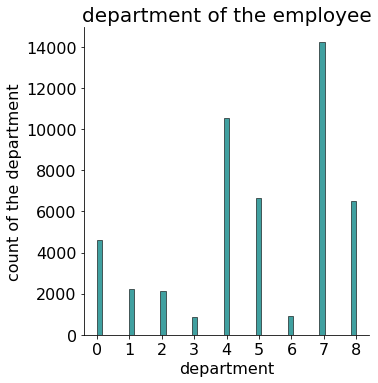

In [27]:
distplot(df['department'], 'teal')

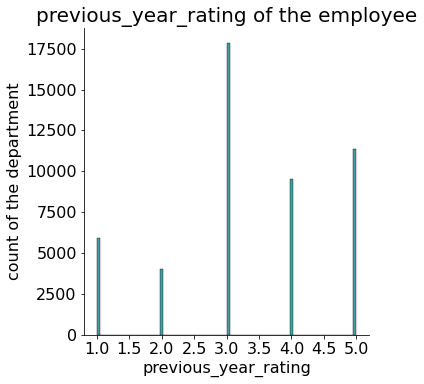

In [28]:
distplot(df['previous_year_rating'], 'teal')

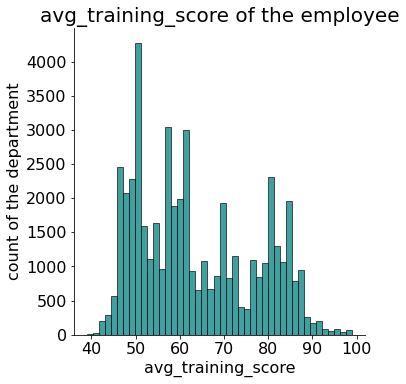

In [29]:
distplot(df['avg_training_score'], 'teal')

In [30]:
 '''Function to count plot'''     
def countplot(variable, title,  color):
    global ax
    font_size = 14
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 8)
    ax = sns.countplot(variable, palette = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(rotation='vertical',fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(title, fontsize = title_size)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



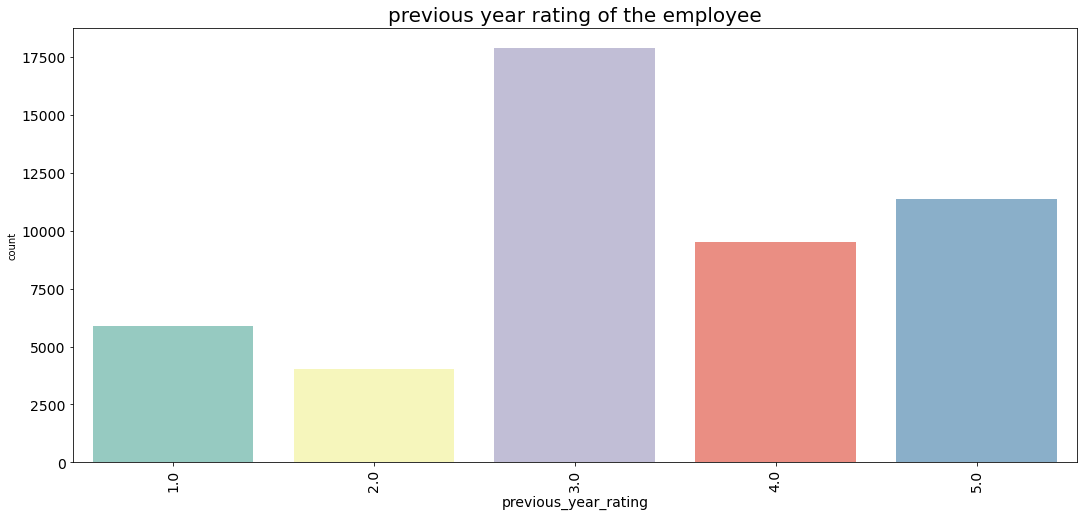

In [31]:
countplot(df['previous_year_rating'],'previous year rating of the employee', 'Set3')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



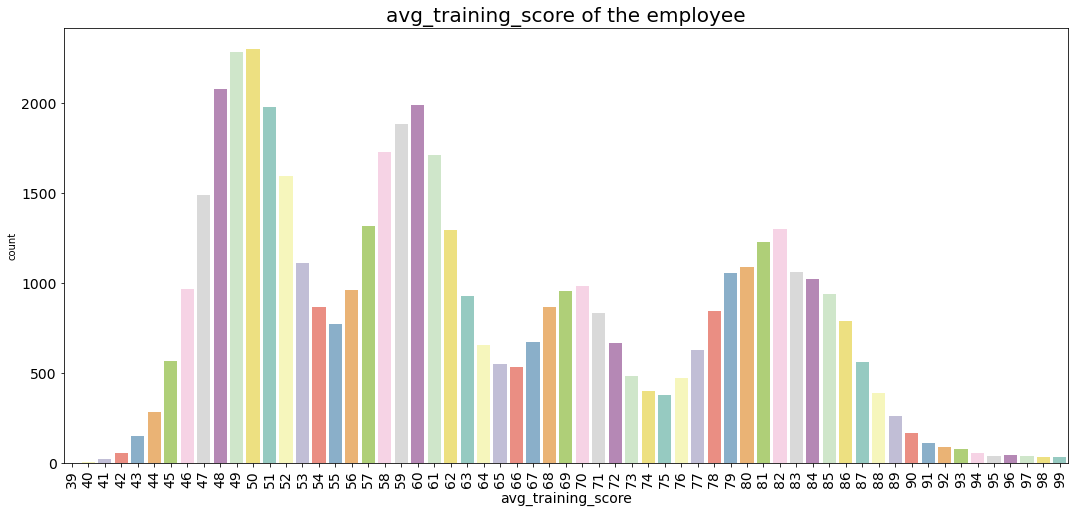

In [32]:
countplot(df['avg_training_score'],'avg_training_score of the employee', 'Set3')

# Bivariate analysis

'''Plot regression plot to see how Rating is correlated with numerical variables.'''
corr_num = df.loc[:, ['previous_year_rating','KPIs_met >80%','avg_training_score', 'is_promoted']]
for i in corr_num.columns:
    x = corr_num[i]
    y = df['is_promoted']
    
    # Creating the dataset and generating the plot
    trace = go.Scatter(
                       x = x,
                       y = y,
                       mode = 'markers',
                       marker = dict(color = 'olive'))
    
    # Layout for regression plot
    title = '{} vs is_promoted'.format(corr_num[i].name)
    layout = go.Layout(title = title, yaxis = dict(title = 'is_promoted'))
    
    fig = go.Figure(data = trace, layout = layout)
    iplot(fig)

# multivariate analysis

In [33]:
df.corr()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,1.000000,-0.008246,-0.005959,-0.005665,0.000260,0.004465,0.001644,0.001215,0.008883,0.000945,0.002306,-0.002929,0.003139,-0.003348,-0.000863,0.002978
department,-0.008246,1.000000,-0.019740,0.013762,0.088488,-0.141178,0.061436,-0.086974,-0.001781,-0.228819,0.000990,-0.024198,0.054051,-0.034020,0.032440,-0.000616
region,-0.005959,-0.019740,1.000000,-0.002163,-0.088621,-0.004081,-0.054862,-0.006135,0.000745,0.023675,0.012016,-0.004926,0.000640,0.017678,-0.046228,0.005262
no_of_trainings,-0.005665,0.013762,-0.002163,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006,0.003724,-0.036773,0.085456,-0.015895,-0.009477
age,0.000260,0.088488,-0.088621,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412,-0.148553,0.336930,-0.002446,-0.044405,-0.003792
previous_year_rating,0.004465,-0.141178,-0.004081,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715,0.012083,0.013150,-0.022828,0.070560,-0.004721
length_of_service,0.001644,0.061436,-0.054862,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267,-0.094436,0.212312,-0.011082,-0.030085,0.003021
KPIs_met >80%,0.001215,-0.086974,-0.006135,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933,0.009214,0.005028,-0.038172,0.045645,-0.005952
awards_won?,0.008883,-0.001781,0.000745,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971,0.000569,-0.001910,0.002275,0.001333,-0.006146
avg_training_score,0.000945,-0.228819,0.023675,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494,0.008878,0.020750,-0.017835,0.031165,-0.008622


<AxesSubplot:>

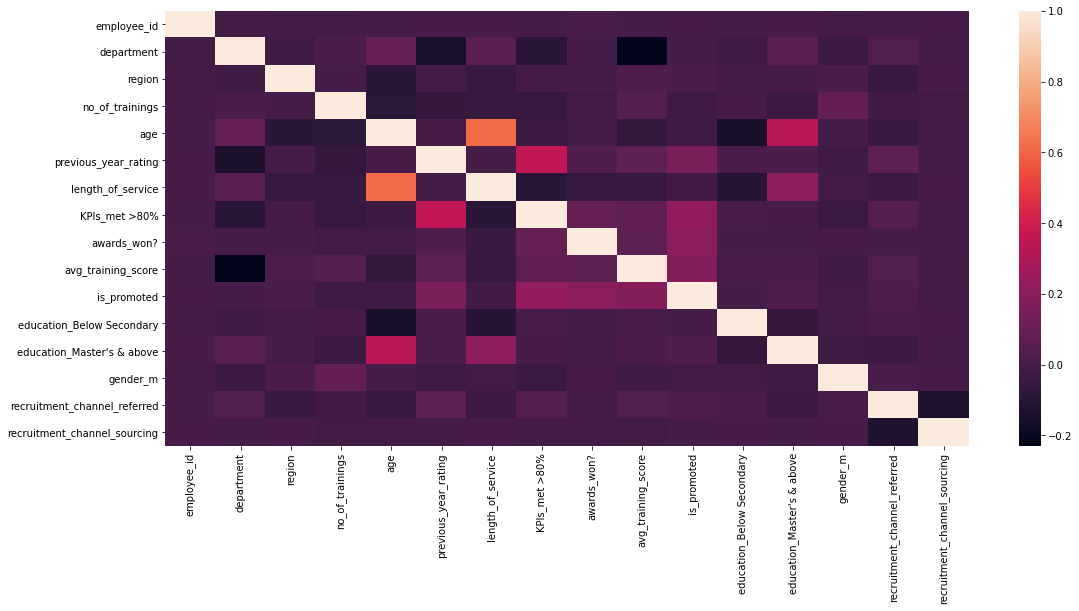

In [34]:
sns.heatmap(df.corr())

# test train split

In [35]:
y=df['is_promoted']
del df['is_promoted']
x=df

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression()


In [40]:
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred=lr.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

In [43]:
confusion_matrix(y_test,y_pred)

array([[14602,     0],
       [ 1456,     0]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.909328683522232

# random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(n_estimators=100,criterion="entropy")

In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [48]:
y_pred=rf.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.9281977830364927

# decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
D_tree=DecisionTreeClassifier(criterion="entropy")

In [52]:
D_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
y_pred=D_tree.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred)

0.8935110225432806